###  Analysis on IMDB useful libraries with sql

> ### Explanation

**SQLite :** - SQLite database is integrated with the application that accesses the database. The applications interact with the SQLite database read and write directly from the database files stored on disk.
         
- SQLite does NOT require a server to run.


- Refer at https://www.sqlite.org/index.html
    
    
    
> 


**PANDAS :**
    - Pandas provide high performance, fast, easy to use data structures and data analysis tools for manipulating numeric data and time series. Pandas is built on the numpy library and written in languages like Python, Cython, and C. In pandas, we can import data from various file formats like JSON, SQL, Microsoft Excel, etc.
    
**NUMPY:**
       - Numpy is an Python library,It is used for scientific computing in python.It contains a collection of tools and techniques that can be used to solve on computers with mathematical model of problems.
       - High performance and multi-dimensional areay objects.
       - High level mathematical functions.
       - matrices
       
       
 ### Data Visualizations
 - Data Visualization is the graphic representation of data. It converts a huge dataset into small graphs, thus aids in data analysis and predictions
       
**MATPLOTLIB**
- It is a Python library used for plotting graphs with the help of other libraries like Numpy and Pandas. It is a powerful tool for visualizing data in Python. It is used for creating statical interferences and plotting 2D graphs of arrays

**SEABORN:**
- It is also a Python library used for plotting graphs with the help of Matplotlib, Pandas, and Numpy. It is built on the roof of Matplotlib and is considered as a superset of the Matplotlib library. It helps in visualizing univariate and bivariate data

In [1]:
# Import Pandas and NumPy

import numpy as np
import pandas as pd

# Import Libraries for plotting    # Visualizations
import matplotlib.pyplot as plt
import seaborn as sns



#pip install db-sqlite3
#SQLite in general is a server-less database that you can use within almost all programming languages including Python.
import sqlite3


# Supress Warnings



####   We import the sqlite3 module and then create a connection object which will connect us to the database and will let us execute the SQL statements.
> - sqlite3.connect(Database)
> - **cursor()** - we can use the cursor object to call the execute() method to execute any SQL queries.


#### STEPS
> To query data in an SQLite database from Python, you use these steps:

- First, establish a connection to the SQLite database by creating a Connection object.
- Next, create a Cursor object using the cursor method of the Connection object.
- Then, execute a  SELECT statement.
- After that, call the fetchall() method of the cursor object to fetch the data.
- Finally, loop the cursor and process each row individually.


In [2]:
mycon = sqlite3.connect('./movies.sqlite')
cur = mycon.cursor()

In [3]:
# Checking the connection
cur

## QUESTIONS

#### **Question 1:** Can you get all data about movies?

In [4]:
cur.execute('SELECT * FROM movies')
#use the cursor object to call the execute() method to execute any SQL queries.
movies = cur.fetchall()

# #movies -> if u print movies , all the data shown in list manner, can't understanadble

# #Note - fetchall() --> fetch all rows for the current query, if no rows avaliable then,it returns an empty list.

# Creating a DataFrame of pandas from the data from the database and assigning column names

movies = pd.DataFrame(movies, columns = ['id', 'original_title', 'budget', 'popularity', 'release_date', 'revenue', 'title', 'vote_average', 'vote_count', 'overview', 'tagline', 'uid', 'director_id'])
# #Creating a dataframe, A dataframe contains rows and columns , It is a Two-dimensional, size-mutable, potentially heterogeneous tabular data.


print('Shape of Movies data :',movies.shape)
print('\n\n')
movies.head(3)
# #Displays first 3 rows in the table


Shape of Movies data : (4773, 13)





,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763
2,43599,Spectre,245000000,107,2015-10-26,880674609,Spectre,6.3,4466,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,206647,4764


In [5]:
import pandas as pd

# Reading Data from database and store in movies_df using pandas function called pd.read_sql

movies_df = pd.read_sql('SELECT * FROM movies', mycon)
movies_df

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763
2,43599,Spectre,245000000,107,2015-10-26,880674609,Spectre,6.3,4466,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,206647,4764
3,43600,The Dark Knight Rises,250000000,112,2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,Following the death of District Attorney Harve...,The Legend Ends,49026,4765
4,43601,John Carter,260000000,43,2012-03-07,284139100,John Carter,6.1,2124,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",49529,4766
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4768,48395,El Mariachi,220000,14,1992-09-04,2040920,El Mariachi,6.6,238,El Mariachi just wants to play his guitar and ...,"He didn't come looking for trouble, but troubl...",9367,5097
4769,48396,Newlyweds,9000,0,2011-12-26,0,Newlyweds,5.9,5,A newlywed couple's honeymoon is upended by th...,A newlywed couple's honeymoon is upended by th...,72766,6485
4770,48397,"Signed, Sealed, Delivered",0,1,2013-10-13,0,"Signed, Sealed, Delivered",7.0,6,"""Signed, Sealed, Delivered"" introduces a dedic...",None,231617,7108
4771,48398,Shanghai Calling,0,0,2012-05-03,0,Shanghai Calling,5.7,7,When ambitious New York attorney Sam is sent t...,A New Yorker in Shanghai,126186,7109


In [6]:
# Checking the information of this dataframe
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4773 non-null   int64  
 1   original_title  4773 non-null   object 
 2   budget          4773 non-null   int64  
 3   popularity      4773 non-null   int64  
 4   release_date    4773 non-null   object 
 5   revenue         4773 non-null   int64  
 6   title           4773 non-null   object 
 7   vote_average    4773 non-null   float64
 8   vote_count      4773 non-null   int64  
 9   overview        4770 non-null   object 
 10  tagline         3951 non-null   object 
 11  uid             4773 non-null   int64  
 12  director_id     4773 non-null   int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 484.9+ KB


In [7]:
# Checking the sum of NaN values

movies_df.isna().sum()

id                  0
original_title      0
budget              0
popularity          0
release_date        0
revenue             0
title               0
vote_average        0
vote_count          0
overview            3
tagline           822
uid                 0
director_id         0
dtype: int64


#### **Question 2:** How do you get all data about directors?

In [8]:
# Assign query to a variable called query and passed it as a parameter in the reas_sql function of pandas

query = 'SELECT * FROM directors'
directors_df = pd.read_sql(query, mycon)
directors_df

,name,id,gender,uid,department
0,James Cameron,4762,2,2710,Directing
1,Gore Verbinski,4763,2,1704,Directing
2,Sam Mendes,4764,2,39,Directing
3,Christopher Nolan,4765,2,525,Directing
4,Andrew Stanton,4766,2,7,Directing
...,...,...,...,...,...
2344,Shane Carruth,7106,2,76624,Directing
2345,Neill Dela Llana,7107,0,1174437,Directing
2346,Scott Smith,7108,0,1219158,Directing
2347,Daniel Hsia,7109,2,208138,Directing


In [9]:
# Checking information of the directors_df
directors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        2349 non-null   object
 1   id          2349 non-null   int64 
 2   gender      2349 non-null   int64 
 3   uid         2349 non-null   int64 
 4   department  2349 non-null   object
dtypes: int64(3), object(2)
memory usage: 91.9+ KB


#### **Question 3:** Check how many movies are present in iMDB.

In [10]:
cur.execute('SELECT COUNT (id) from movies;')
#use the cursor object to call the execute() method to execute any SQL queries.
count = cur.fetchall()
print("the number of movies is present in IMDB is  :",count[0])
#Note - fetchall() --> fetch all rows for the current query, if no rows avaliable then,it returns an empty list.




the number of movies is present in IMDB is  : (4773,)


In [11]:
##ASSIGNMENT

# dataframes to be used for pandas - movies_df, directors_df
# for sql table names are movies and directors

#### **Question 4:** Find these 3 directors: James Cameron ; Luc Besson ; John Woo


In [12]:
# Query to select all fields where the three directors name 
query = 'SELECT * FROM directors WHERE name = "James Cameron" OR NAME = "Luc Besson" OR NAME = "John Woo" AND department = "Directing"'
cur.execute(query)
cur.fetchall()

[('James Cameron', 4762, 2, 2710, 'Directing'),
 ('John Woo', 4893, 2, 11401, 'Directing'),
 ('Luc Besson', 4949, 2, 59, 'Directing')]

#### **Question 5:** Find all directors with name starting with Steven.


In [13]:
# Query to filter out names starting with Steven
query = 'SELECT * FROM directors WHERE name LIKE "Steven%"'
cur.execute(query)
# cur.fetchall()

# Storing the data after filtering in a pandas dataframe
df = pd.DataFrame(cur.fetchall(), columns=['Name', 'id', 'gender','uid', 'department'])
df

,Name,id,gender,uid,department
0,Steven Spielberg,4799,2,488,Directing
1,Steven Soderbergh,4909,2,1884,Directing
2,Steven Brill,5013,2,32593,Directing
3,Steven Zaillian,5117,2,2260,Directing
4,Steven Quale,5216,2,93214,Directing
5,Steven Seagal,5221,2,23880,Directing
6,Steven E. de Souza,5390,2,1726,Directing
7,Steven Shainberg,5803,2,67795,Directing
8,Steven R. Monroe,6713,2,88039,Directing


#### **Question 6:** Count female directors.


In [14]:
# Checking the data for the value of female gender in the table and founded to be 0
directors_df.value_counts()

name                id    gender  uid      department
Aaron Hann          6671  0       1454563  Directing     1
Mor Loushy          6972  0       1414864  Directing     1
Mike Nawrocki       5870  2       78298    Directing     1
Mike Newell         4797  2       10723    Directing     1
Mike Nichols        5031  2       5342     Directing     1
                                                        ..
Guillaume Ivernel   5799  2       66856    Directing     1
Guillermo del Toro  4798  2       10828    Directing     1
Gurinder Chadha     6134  1       6220     Directing     1
Gus Van Sant        5283  2       5216     Directing     1
Étienne Faure       6993  0       1555903  Directing     1
Length: 2349, dtype: int64

In [15]:
# Query to count the id value where the gender is equal to 0
query = 'SELECT count(id) FROM directors WHERE gender = 0'
cur.execute(query)

# Printing the value using print function

print(f'Total Number of female directors in the given table is {cur.fetchall()[0][0]}')

Total Number of female directors in the given table is 625


#### **Question 7:**  Find the name of the 10th first women directors?


In [16]:
# Query to select name of female directors and limiting it to be 10

query = 'SELECT name FROM directors WHERE gender = 0 AND department = "Directing" limit 10'
cur.execute(query)

# Making a dataframe and displaying with custom index using numpy arange function
df = pd.DataFrame(cur.fetchall(), columns=['Name'])
df.index = (np.arange(1,11))
df

,Name
1,Chris Weitz
2,Justin Lin
3,David Ayer
4,Kevin Reynolds
5,Robert Stromberg
6,Roland Joffé
7,Carl Rinsch
8,James Bobin
9,Chris Buck
10,Hoyt Yeatman


#### **Question 8:** What are the 3 most popular movies?


In [17]:
# query to select the top 3 most popular movies in the given table
query = 'SELECT original_title, popularity from movies order by popularity desc limit 3'
cur.execute(query)
# making the result as a DataFrame and providing custom columns and index
df  = pd.DataFrame(cur.fetchall(), columns=['Movie Title', 'Popularity'], index = np.arange(1,4))
df

,Movie Title,Popularity
1,Minions,875
2,Interstellar,724
3,Deadpool,514


#### **Question 9:**  What are the 3 most bankable movies?
 

In [18]:
# query to select the top 3 most bankable (Most Revenge gained) movies in the given table
query = 'SELECT original_title, revenue from movies order by popularity desc limit 3'
cur.execute(query)
# making the result as a DataFrame and providing custom columns and index
df  = pd.DataFrame(cur.fetchall(), columns=['Movie Title', 'Revenue'], index = np.arange(1,4))
df

,Movie Title,Revenue
1,Minions,1156730962
2,Interstellar,675120017
3,Deadpool,783112979


#### **Question 10:**  What is the most awarded average vote since the January 1st, 2000?


In [19]:
# query to select the top 3 most bankable (Most Revenge gained) movies in the given table
query = 'SELECT original_title,vote_average, vote_count, release_date, max(vote_average) from movies WHERE release_date > "2000-01-01"'
cur.execute(query)
# making the result as a DataFrame and providing custom columns and index
df  = pd.DataFrame(cur.fetchall(), columns=['Movie Title', 'Average Vote', 'Vote Count', 'Release Date', 'Max Avg Vote'],)
df

,Movie Title,Average Vote,Vote Count,Release Date,Max Avg Vote
0,Sardaarji,9.5,2,2015-06-26,9.5


### JOINS
> Inner join
> left join
> right join
> full outer join
- #### Explanation

> Inner join : - Wherever the data matching between the two tables only thouse records will displayed . (Only matched in both tables)

> Left join : - All the data which is present on the left side will displayed, irrespective it having matching entry will displays or if it does not match entry on another table

> Right join : - ( vice-versa ) as Left join From right table all records will displayas, irrespective
But in left table who are matching are be displayed

> full outer join : -  It is a combination of  Inner join , Left join, Right join.
> **Full outer join** shows all matching records,
- It will displays all matching records as well as It will display non matching records  On left table and right table.
- It will show every thing on what tables contains
                        
                     
        
**NOTE** 
- >  Left join display all records in left table
- >  Right join display all records in right table
- >  Inner join display only matching records from tables



#### **Question 11:**  Which movie(s) were directed by Brenda Chapman?


In [20]:
#using sql

# Query to join two tables and list the data directed by Brenda Chapman
query = 'SELECT * FROM directors LEFT JOIN movies ON directors.id = movies.director_id  where name = "Brenda Chapman"'
# cur.execute(query)
# cur.fetchall()

df = pd.read_sql(query, mycon)
df

,name,id,gender,uid,department,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,Brenda Chapman,4801,1,59803,Directing,43652,Brave,185000000,125,2012-06-21,538983207,Brave,6.7,4641,Brave is set in the mystical Scottish Highland...,Change your fate.,62177,4801


#### **Question 12:** Whose director made the most movies?



In [21]:
# Query to list the number of movies by certain director and order it  by descending to show the director with the most movies
query = 'SELECT count(movies.id) AS number_of_movies , name FROM directors LEFT JOIN movies ON directors.id = movies.director_id group by name ORDER BY count(movies.id) DESC'
df = pd.read_sql(query, mycon)
df

,number_of_movies,name
0,27,Steven Spielberg
1,21,Woody Allen
2,20,Martin Scorsese
3,20,Clint Eastwood
4,16,Spike Lee
...,...,...
2344,1,Adam Carolla
2345,1,Adam Brooks
2346,1,Abel Ferrara
2347,1,Aaron Schneider


#### **Question 13:** Whose director is the most bankable?


In [22]:
# Query to get the most profitable director by finding the max function and ordering it on descending
query = 'SELECT max(revenue) AS total_revenue , name FROM directors LEFT JOIN movies ON directors.id = movies.director_id group by name ORDER BY max(revenue) DESC'
df = pd.read_sql(query, mycon)
df

,total_revenue,name
0,2787965087,James Cameron
1,1519557910,Joss Whedon
2,1513528810,Colin Trevorrow
3,1506249360,James Wan
4,1274219009,Chris Buck
...,...,...
2344,0,Adam Green
2345,0,Adam Goldberg
2346,0,Adam Carolla
2347,0,Aaron Schneider


# Analysis on IMDB DATA SET

### Budget Analysis

**Question** - List out Top 10 highest budget made movies 

In [23]:
# Query to get top 10 high budget movies
query = 'SELECT original_title, directors.name AS director_name, budget FROM movies LEFT JOIN directors on movies.director_id = directors.id ORDER BY budget DESC LIMIT 10'
df = pd.read_sql (query,mycon)
df

,original_title,director_name,budget
0,Pirates of the Caribbean: On Stranger Tides,Rob Marshall,380000000
1,Pirates of the Caribbean: At World's End,Gore Verbinski,300000000
2,Avengers: Age of Ultron,Joss Whedon,280000000
3,Superman Returns,Bryan Singer,270000000
4,John Carter,Andrew Stanton,260000000
5,Tangled,Byron Howard,260000000
6,Spider-Man 3,Sam Raimi,258000000
7,The Lone Ranger,Gore Verbinski,255000000
8,The Dark Knight Rises,Christopher Nolan,250000000
9,Harry Potter and the Half-Blood Prince,David Yates,250000000






> ## Note :

The mostExpensive Table Contains List Of Movies With Highest Production Costs. 

For Your Information, Pirates of the Caribbean: On Stranger Tides, Directed By Rob Marshall, Is The Most Production Costs, It's USD 380,000,000.

### Popularity Analysis

**Question**- List out Top 10 popularity on movies

In [24]:
 # Query to list out top 10 popular movies

query = 'SELECT original_title,  directors.name AS director_name, popularity FROM movies LEFT JOIN directors on movies.director_id = directors.id ORDER BY popularity DESC LIMIT 10'
df = pd.read_sql (query,mycon)
df

,original_title,director_name,popularity
0,Minions,Kyle Balda,875
1,Interstellar,Christopher Nolan,724
2,Deadpool,Tim Miller,514
3,Guardians of the Galaxy,James Gunn,481
4,Mad Max: Fury Road,George Miller,434
5,Jurassic World,Colin Trevorrow,418
6,Pirates of the Caribbean: The Curse of the Bla...,Gore Verbinski,271
7,Dawn of the Planet of the Apes,Matt Reeves,243
8,The Hunger Games: Mockingjay - Part 1,Francis Lawrence,206
9,Big Hero 6,Chris Williams,203




> ## Note:

mostPopular Table Shows 10 Movies With The Highest Ranking By Popularity. 

Currently, Minions Directed By Kyle Balda Got The First Place With Score 875, Beating Interstellar As The Closest Competitor, Deadpool And The Other Competitors.

### Revenu Analysis

**Question** - What are the top 10 Revenue  movies  

In [25]:
# Query to get top 10 profitabble movies
query = 'SELECT original_title,  directors.name AS director_name, revenue FROM movies LEFT JOIN directors on movies.director_id = directors.id ORDER BY revenue DESC LIMIT 10'
df = pd.read_sql (query,mycon)
df

,original_title,director_name,revenue
0,Avatar,James Cameron,2787965087
1,Titanic,James Cameron,1845034188
2,The Avengers,Joss Whedon,1519557910
3,Jurassic World,Colin Trevorrow,1513528810
4,Furious 7,James Wan,1506249360
5,Avengers: Age of Ultron,Joss Whedon,1405403694
6,Frozen,Chris Buck,1274219009
7,Iron Man 3,Shane Black,1215439994
8,Minions,Kyle Balda,1156730962
9,Captain America: Civil War,Anthony Russo,1153304495




> ## Note :

The mostProfit Table Shows The 10 Movies Got The Highest Gross Profit When Compared To The Other Movies.

It Turns Out That Avatar Directed By James Cameron Got A Gross Profit USD 2,787,965,087. It's Make Avatar In First Place, Followed By Titanic, The Avengers, Jurassic World, And Others.

From The Table, It Can Be Seen That James Cameron Make Two Movies To Fill The First And Second Place On The Rankings.



**Question** - Display most popular movies with vote_average

In [26]:
# Query to get the popular movie based on vote average
query = 'SELECT original_title,  directors.name AS director_name, vote_average FROM movies LEFT JOIN directors on movies.director_id = directors.id ORDER BY popularity DESC LIMIT 10'
df = pd.read_sql (query,mycon)
df

,original_title,director_name,vote_average
0,Minions,Kyle Balda,6.4
1,Interstellar,Christopher Nolan,8.1
2,Deadpool,Tim Miller,7.4
3,Guardians of the Galaxy,James Gunn,7.9
4,Mad Max: Fury Road,George Miller,7.2
5,Jurassic World,Colin Trevorrow,6.5
6,Pirates of the Caribbean: The Curse of the Bla...,Gore Verbinski,7.5
7,Dawn of the Planet of the Apes,Matt Reeves,7.3
8,The Hunger Games: Mockingjay - Part 1,Francis Lawrence,6.6
9,Big Hero 6,Chris Williams,7.8




> ## Note : 

From the mostProfit Table, It Can Be Seen That The Movies In The First And Second Rank Is A Movies Directed By James Cameron.

In The Table moviesByJamesCameron Shows All Movies Directed By James Cameron.

### Voting Analysis

**Question** - List out Particular movie for Voting average and votecount 

In [27]:
# query to select the movie with vote average and vote count
query = 'SELECT original_title, vote_average, vote_count, directors.name FROM movies LEFT JOIN directors ON movies.director_id = directors.id ORDER BY vote_average DESC '

df = pd.read_sql(query, mycon)
df

,original_title,vote_average,vote_count,name
0,Stiff Upper Lips,10.0,1,Gary Sinyor
1,"Dancer, Texas Pop. 81",10.0,1,Tim McCanlies
2,Sardaarji,9.5,2,Rohit Jugraj
3,One Man's Hero,9.3,2,Lance Hool
4,The Shawshank Redemption,8.5,8205,Frank Darabont
...,...,...,...,...
4768,The Legend of God's Gun,0.0,0,Mike Bruce
4769,Her Cry: La Llorona Investigation,0.0,0,Damir Catic
4770,Dutch Kills,0.0,0,Joseph Mazzella
4771,Stories of Our Lives,0.0,0,Jim Chuchu


In [28]:
# Query to get a particular movie with the vote average and vote count
query = 'SELECT original_title, vote_average, vote_count, directors.name FROM movies LEFT JOIN directors ON movies.director_id = directors.id WHERE movies.original_title = "Inception"'

df = pd.read_sql(query, mycon)
df

,original_title,vote_average,vote_count,name
0,Inception,8.1,13752,Christopher Nolan


 

> ## Note :

BestVote Table Contains The Best Movies By Vote. Stiff Upper Lips, Directed By Gary Sinyor And Dancer, Texas Pop. 81 Directed by the MacCanlies Was Successfully Becomes the Best Movies By Vote With Perfect Score, 10.

However, There Are Anomalies. It Turned Out That The Two Movies Were Only Vote By One Person. So, Likely to Affect The Assessment Results..

### CORRELATION
- **Correlation** is also a statistical technique that determines how the change of one variable related to another variable affects the relationship.
-  it defines the degree of relation between two variables. There exist three types of correlations - positive and negative, and zero correlations. 



> The main intention of Seaborn heatmap is to visualize the correlation matrix of data for feature selection to solve business problems
> Python data visualization seaborn library has a powerful function that is called sns.heatmap(). 
> annot — **annot** when set to True, the correlation values become visible on the colored cells
> linewidth- **linewidth** Width of the lines that will divide each cell.


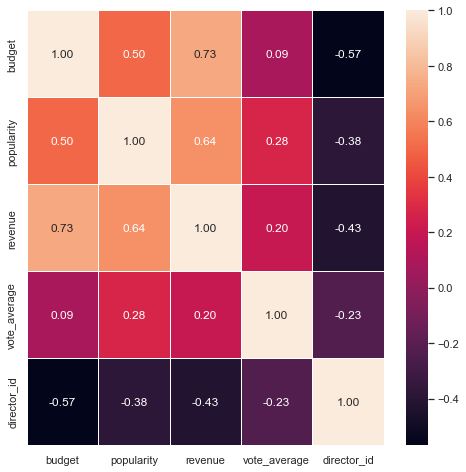

In [29]:
# plot a heatmap of correlation
#corr() is used to create the correlation matrix.
#You'll have to make sure that all the elements in the matrix are of numeric type. 
#If they are not of the numeric type you'll have to add or concat them explicitly.

sns.set(rc = {'figure.figsize': (8, 8)})
sns.heatmap(movies[['budget', 'popularity', 'revenue', 'vote_average', 'director_id']].corr(), 
            annot = True, fmt = '.2f', linewidth = 1);



> ## Note On correlation :

The Heat Map Graph Shows The Effect Between One Variable To The Other Variables. 

In The Graph, It Is Clear That budget Has The Greatest Impact on revenue with 0.73. 

Meanwhile, popularity Is Quite Impact On revenue, And director_id Which Means director_name Also Has A Correlation With revenue, Even Though It Is Small. 

However, vote_average Has A Very Small Correlation With revenue.

### Directors

**Question**- List out the  director names with number of movies and revenue

In [30]:
# Query to list the directors with the number of movies and sum of the revenue
query = 'SELECT directors.id, name, count(movies.title) AS movie_count, sum(revenue) AS total_revenue FROM directors LEFT JOIN movies ON directors.id = movies.director_id GROUP BY name '
df = pd.read_sql(query, mycon)
df

# Folloing print is used to print all the data of the DataFrame

# print(df.to_string())

,id,name,movie_count,total_revenue
0,6671,Aaron Hann,1,0
1,6252,Aaron Schneider,1,0
2,5974,Abel Ferrara,1,1227324
3,6247,Adam Brooks,1,55447968
4,6742,Adam Carolla,1,0
...,...,...,...,...
2344,5043,Àlex Pastor,1,5802422
2345,6127,Álex de la Iglesia,1,0
2346,6338,Émile Gaudreault,1,3031801
2347,6603,Éric Tessier,1,0


In [31]:
# Checking the duplicate exists or not

print(movies_df.duplicated(['director_id']).value_counts())

True     2424
False    2349
dtype: int64




> ## Note :

The mostProfitableDirector Table Shows The Directors With The Highest Gross Profit. 

Currently, Steven Spielberg Is The Director With The Most Gross Profit, with USD 9,147,393,164 from his 27 movies. 

Then, Peter Jackson With USD 6,498,642,820, James Cameron With USD 5,883,569,439, And The Other Directors.

**Question** - Display all the number of movies for particular director and revenue .

In [32]:
# Query to display the number of movies and revenue order by descending on count of movies

query = 'SELECT directors.name, count(movies.id) AS number_of_movies, sum(movies.revenue) AS total_revenue FROM movies LEFT JOIN directors ON directors.id = movies.director_id GROUP BY directors.name ORDER BY count(movies.id) DESC'
df = pd.read_sql(query, mycon)
df.head(15)

,name,number_of_movies,total_revenue
0,Steven Spielberg,27,9147393164
1,Woody Allen,21,669101038
2,Martin Scorsese,20,1956635998
3,Clint Eastwood,20,2512058888
4,Spike Lee,16,340618771
5,Robert Rodriguez,16,1109899581
6,Ridley Scott,16,3189557997
7,Steven Soderbergh,15,2114864443
8,Renny Harlin,15,1031500590
9,Tim Burton,14,3337418241




> ### Note :

The mostProductiveDirector Table Contains The Name Of The Director And The Number Of Movies It Has Directed By Him. 

Steven Spielberg Is The Most Productive Director With 27 Movies Titles He Has Directed. Meanwhile, Woody Allen Has Only 21 Movies Titles. 

Then, Martin Scorsese And Clint Eastwood With 20 Movies Titles.


**Question**- By doing Director analysis We know Steven Spielberg is the highest revenue, so list the Steven Spielberg movies info

In [33]:
# Query to join 2 tables
query  = 'SELECT * FROM movies LEFT JOIN directors ON movies.director_id  =  directors.id'
df = pd.read_sql(query, mycon)

# Showing DataFrame info method for Steven Spielberg
df[df['name']=='Steven Spielberg'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 53 to 3006
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              27 non-null     int64  
 1   original_title  27 non-null     object 
 2   budget          27 non-null     int64  
 3   popularity      27 non-null     int64  
 4   release_date    27 non-null     object 
 5   revenue         27 non-null     int64  
 6   title           27 non-null     object 
 7   vote_average    27 non-null     float64
 8   vote_count      27 non-null     int64  
 9   overview        27 non-null     object 
 10  tagline         27 non-null     object 
 11  uid             27 non-null     int64  
 12  director_id     27 non-null     int64  
 13  name            27 non-null     object 
 14  id              27 non-null     int64  
 15  gender          27 non-null     int64  
 16  uid             27 non-null     int64  
 17  department      27 non-null     ob



> ## Note : 

From Two Tables Above, mostProfitableDirector And mostProductiveDirector, It Can Be Seen That Steven Spielberg Is Always In The First Place. 

It Can Be Understood That Steven Spielberg Has Produced Many And Incredible Movies That Are Shows In The Table MoviesByStevenSpielberg Above.

